**Importing Libraries for Machine Learning Model**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')





# Load the dataset


In [2]:
data = pd.read_csv("C:/Users/koteswar/Downloads/MinorProject.csv")

In [3]:
# Display the first few rows of the dataset
print(data.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1  2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2  2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3  2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4  2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   

     Volume  
0  11896100  
1  12595800  
2   8981500  
3   9306700  
4  16906900  


In [4]:
# Display information about the dataset, including data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [5]:
# Display the shape of the dataset (rows, columns)
print(data.shape)

(1009, 7)


In [6]:
# Count the number of non-NA cells for each column
print(data.count())

Date         1009
Open         1009
High         1009
Low          1009
Close        1009
Adj Close    1009
Volume       1009
dtype: int64


In [7]:
# Display data types of each column
print(data.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [8]:
# Generate descriptive statistics
print(data.describe())

              Open         High          Low        Close    Adj Close  \
count  1009.000000  1009.000000  1009.000000  1009.000000  1009.000000   
mean    419.059673   425.320703   412.374044   419.000733   419.000733   
std     108.537532   109.262960   107.555867   108.289999   108.289999   
min     233.919998   250.649994   231.229996   233.880005   233.880005   
25%     331.489990   336.299988   326.000000   331.619995   331.619995   
50%     377.769989   383.010010   370.880005   378.670013   378.670013   
75%     509.130005   515.630005   502.529999   509.079987   509.079987   
max     692.349976   700.989990   686.090027   691.690002   691.690002   

             Volume  
count  1.009000e+03  
mean   7.570685e+06  
std    5.465535e+06  
min    1.144000e+06  
25%    4.091900e+06  
50%    5.934500e+06  
75%    9.322400e+06  
max    5.890430e+07  


In [9]:
# Check for missing values
print(data.isna().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [10]:
# Display the first few rows again
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [11]:
# Identify columns with object data type
print(data.select_dtypes(include='object').columns)

Index(['Date'], dtype='object')


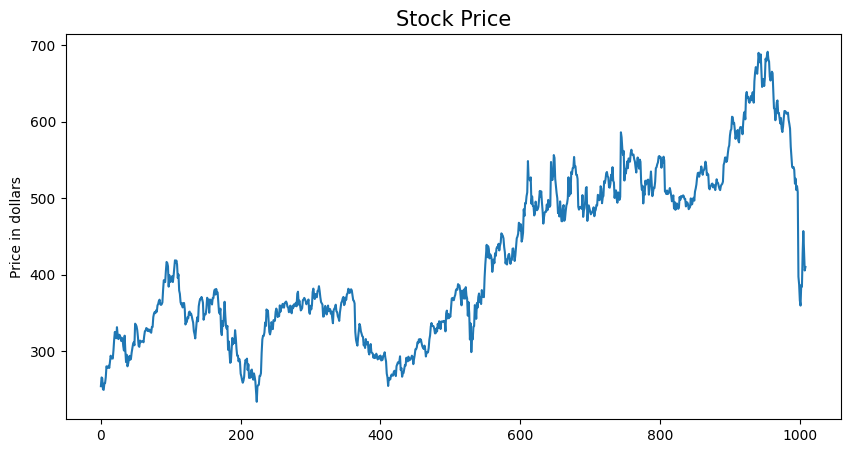

         Date        Open        High         Low       Close   Adj Close  \
0  2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1  2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2  2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3  2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4  2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   

     Volume  
0  11896100  
1  12595800  
2   8981500  
3   9306700  
4  16906900  
(1009, 7)


In [12]:
# Plot the 'Close' column to visualize stock prices
plt.figure(figsize=(10, 5))
plt.plot(data['Close'])
plt.title('Stock Price', fontsize=15)
plt.ylabel('Price in dollars')
plt.show()

print(data.head())

print(data[data['Close'] == data['Adj Close']].shape)

In [13]:
# Drop the 'Adj Close' column as it is not needed
df = data.drop(['Adj Close'], axis=1)
print(df.head())

         Date        Open        High         Low       Close    Volume
0  2018-02-05  262.000000  267.899994  250.029999  254.259995  11896100
1  2018-02-06  247.699997  266.700012  245.000000  265.720001  12595800
2  2018-02-07  266.579987  272.450012  264.329987  264.559998   8981500
3  2018-02-08  267.079987  267.619995  250.000000  250.100006   9306700
4  2018-02-09  253.850006  255.800003  236.110001  249.470001  16906900


In [14]:
# Check for missing values in the new dataframe
print(df.isnull().sum())

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


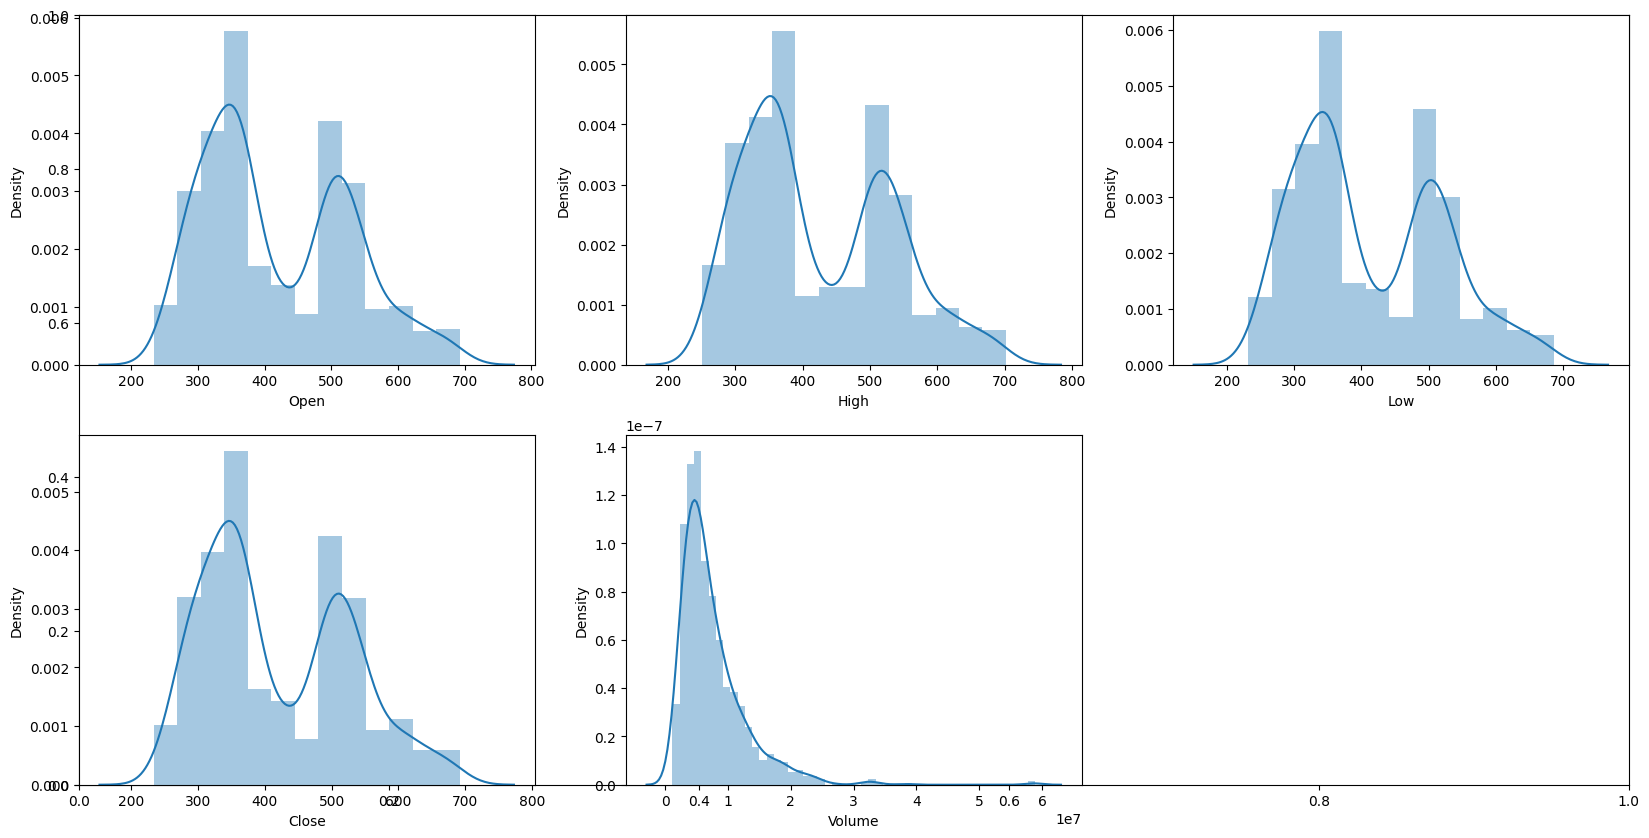

In [15]:
# Define features to be used
features = ['Open', 'High', 'Low', 'Close', 'Volume']

# Plot distribution of each feature
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.distplot(df[col])
plt.show()

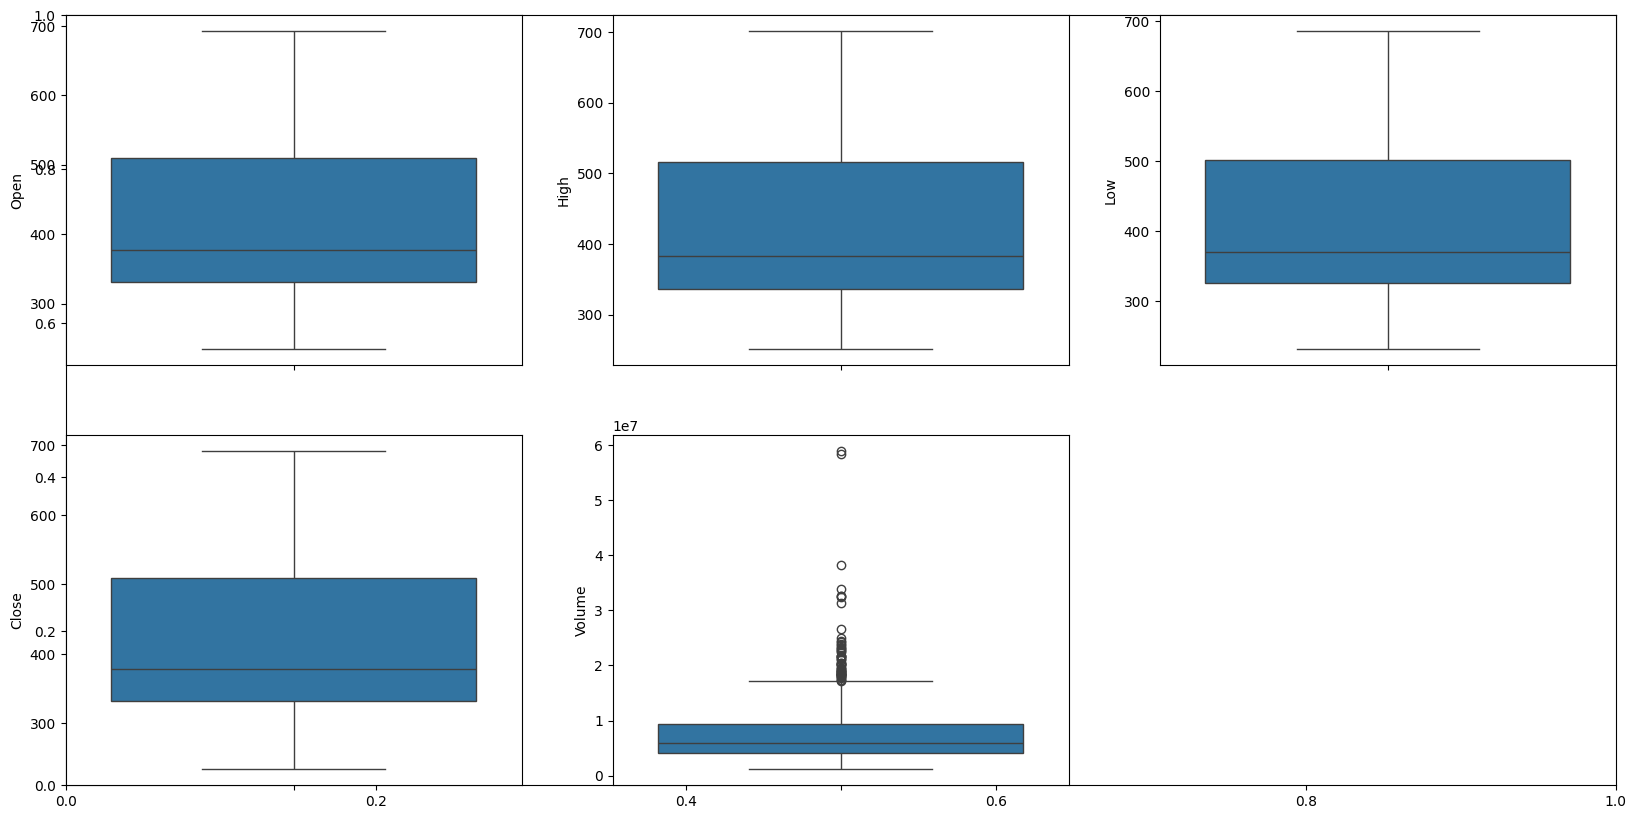

In [16]:
# Plot boxplots of each feature to detect outliers
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(df[col])
plt.show()

In [17]:
# Convert 'Date' column to datetime format and extract day, month, year
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

splitted = df['Date'].dt.strftime('%d/%m/%Y').str.split('/', expand=True)
df['Day'] = splitted[0].astype('int')
df['Month'] = splitted[1].astype('int')
df['Year'] = splitted[2].astype('int')

print(df.head())

        Date        Open        High         Low       Close    Volume  Day  \
0 2018-02-05  262.000000  267.899994  250.029999  254.259995  11896100    5   
1 2018-02-06  247.699997  266.700012  245.000000  265.720001  12595800    6   
2 2018-02-07  266.579987  272.450012  264.329987  264.559998   8981500    7   
3 2018-02-08  267.079987  267.619995  250.000000  250.100006   9306700    8   
4 2018-02-09  253.850006  255.800003  236.110001  249.470001  16906900    9   

   Month  Year  
0      2  2018  
1      2  2018  
2      2  2018  
3      2  2018  
4      2  2018  


In [18]:
# Add a column to identify quarter-end months
df['is_quarter_end'] = np.where(df['Month']%3 == 0, 1, 0)
print(df.head())

        Date        Open        High         Low       Close    Volume  Day  \
0 2018-02-05  262.000000  267.899994  250.029999  254.259995  11896100    5   
1 2018-02-06  247.699997  266.700012  245.000000  265.720001  12595800    6   
2 2018-02-07  266.579987  272.450012  264.329987  264.559998   8981500    7   
3 2018-02-08  267.079987  267.619995  250.000000  250.100006   9306700    8   
4 2018-02-09  253.850006  255.800003  236.110001  249.470001  16906900    9   

   Month  Year  is_quarter_end  
0      2  2018               0  
1      2  2018               0  
2      2  2018               0  
3      2  2018               0  
4      2  2018               0  


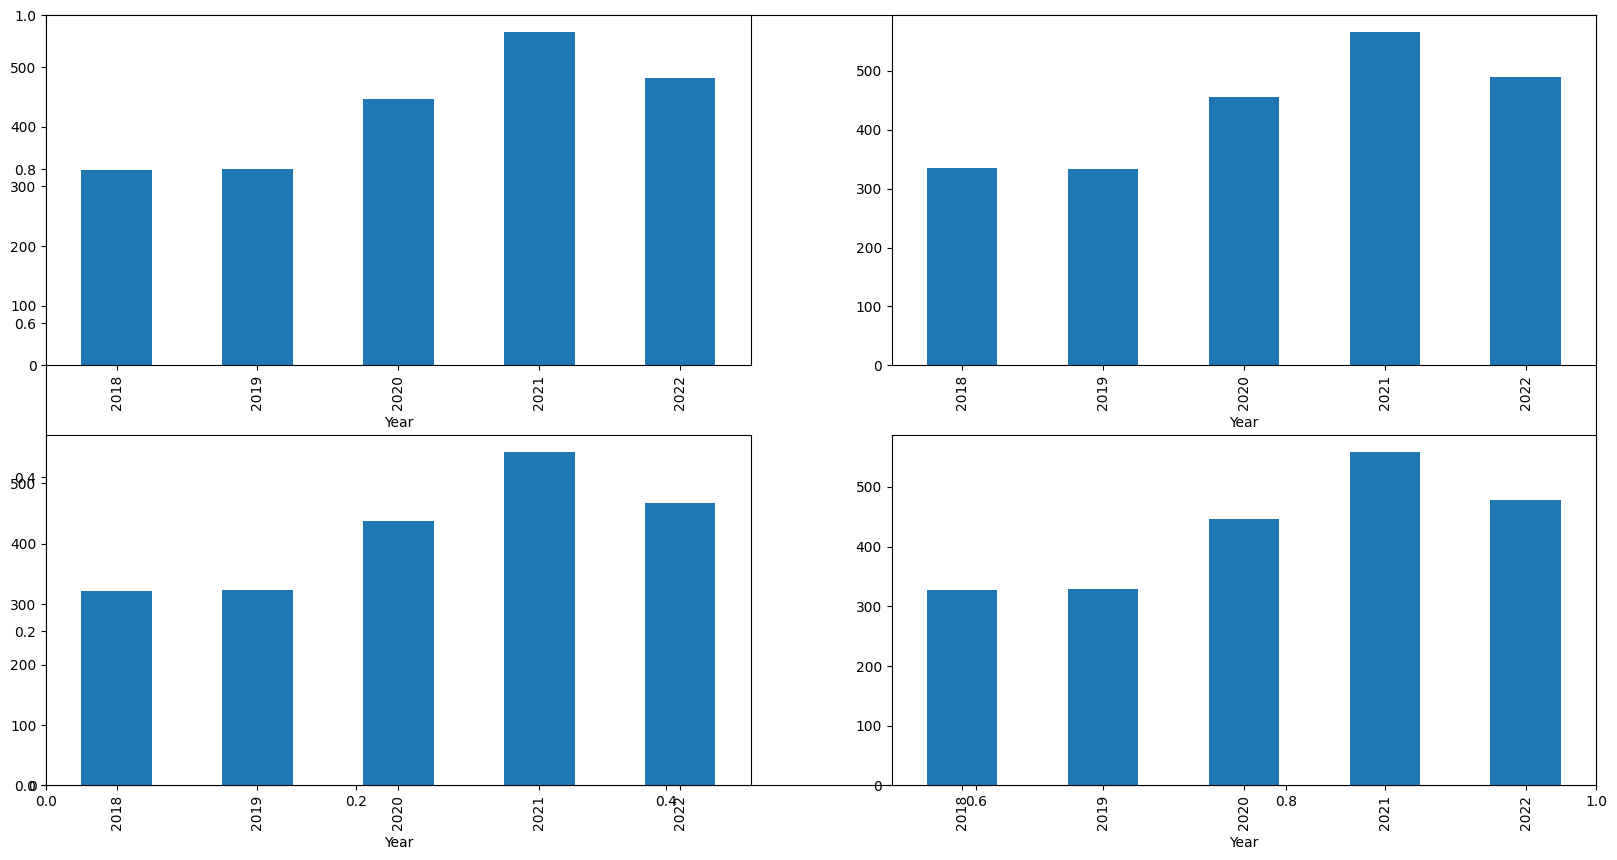

In [19]:
# Group data by year and calculate mean
data_grouped = df.groupby('Year').mean()

# Plot the mean values of 'Open', 'High', 'Low', 'Close' by year
plt.subplots(figsize=(20, 10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i+1)
    data_grouped[col].plot.bar()
plt.show()

In [20]:
# Drop the 'Date' column as it is no longer needed
if 'Date' in df.columns:
    df = df.drop(['Date'], axis=1)
else:
    print("The 'Date' column does not exist in the DataFrame.")

In [21]:
# Group data by quarter-end status and calculate mean
print(df.groupby('is_quarter_end').mean())

                      Open        High         Low       Close        Volume  \
is_quarter_end                                                                 
0               418.681368  424.889821  412.112068  418.699791  7.951664e+06   
1               419.814037  426.179910  412.896440  419.600831  6.810988e+06   

                      Day     Month         Year  
is_quarter_end                                    
0               15.715774  6.087798  2019.622024  
1               15.721068  7.442136  2019.543027  


In [22]:
# Create new features 'open-close' and 'low-high'
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']

# Create target variable indicating if the next day's close is higher than the current day's close
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

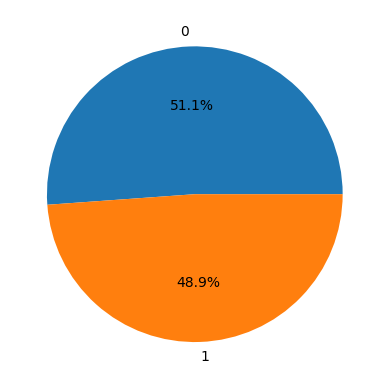

In [23]:
# Plot the target variable distribution
plt.pie(df['target'].value_counts().values, labels=[0, 1], autopct='%1.1f%%')
plt.show()

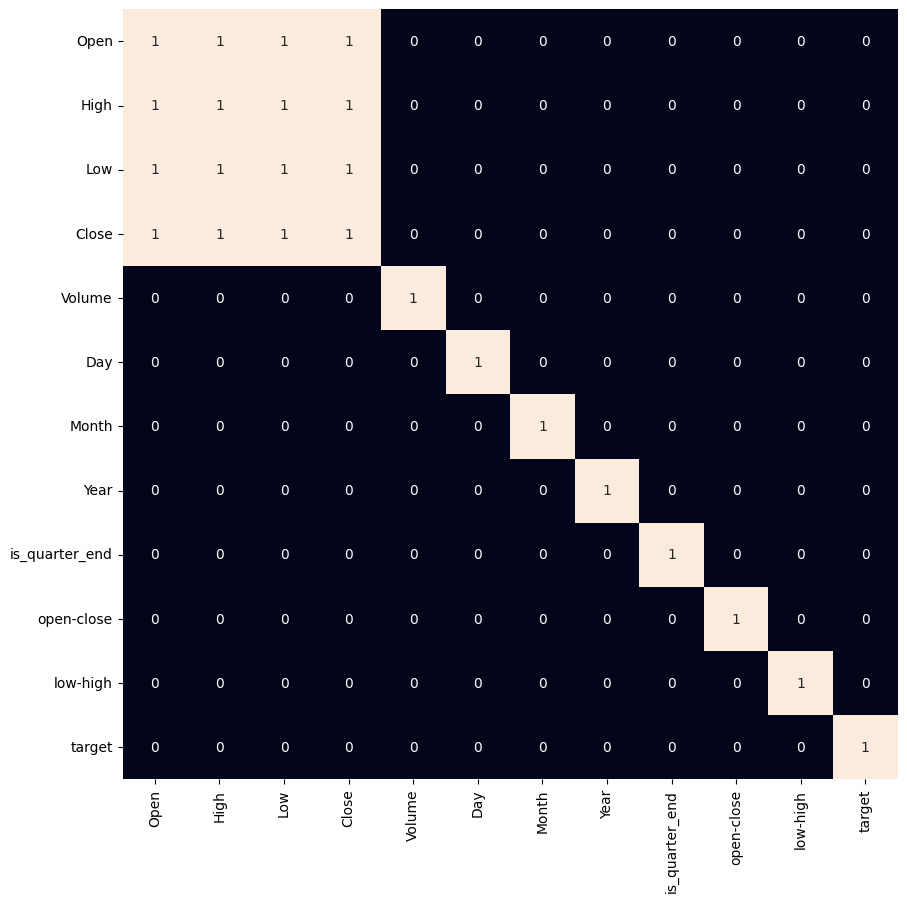

In [24]:
# Plot correlation heatmap for features
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [25]:
# Select relevant features and target variable
features_classification = df[['open-close', 'low-high', 'is_quarter_end']]
target_classification = df['target']

# Standardize features
scalar = StandardScaler()
features_classification = scalar.fit_transform(features_classification)

# Split data into training and validation sets
X_train_class, X_valid_class, Y_train_class, Y_valid_class = train_test_split(features_classification, target_classification, test_size=0.1, random_state=2021)
print(X_train_class.shape, X_valid_class.shape)

(908, 3) (101, 3)


In [26]:
# Define models to be used
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

# Train and evaluate each model
for i in range(3):
    models[i].fit(X_train_class, Y_train_class)

    print(f'{models[i]}: ')
    print('Training Accuracy: ', metrics.roc_auc_score(Y_train_class, models[i].predict_proba(X_train_class)[:, 1]))
    print('Validation Accuracy: ', metrics.roc_auc_score(Y_valid_class, models[i].predict_proba(X_valid_class)[:, 1]))
    print()

LogisticRegression(): 
Training Accuracy:  0.5524207052199869
Validation Accuracy:  0.5090408805031446

SVC(kernel='poly', probability=True): 
Training Accuracy:  0.45833474895042103
Validation Accuracy:  0.4772012578616352

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...): 
Training Accura

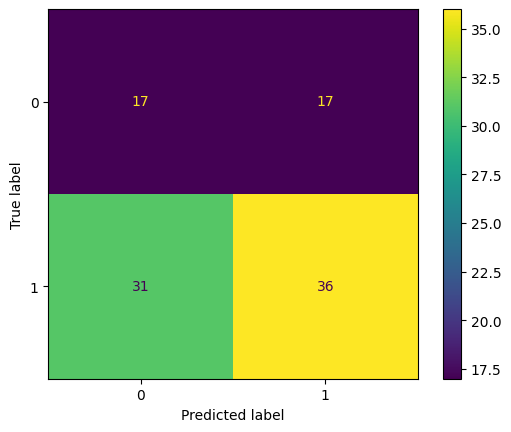

In [27]:
# Plot confusion matrix for Logistic Regression model
metrics.ConfusionMatrixDisplay.from_predictions(models[0].predict(X_valid_class), Y_valid_class)
plt.show()

In [28]:
# Linear Regression
# Prepare the dataset for linear regression
# We'll use 'Open', 'High', 'Low', and 'Volume' to predict 'Close'
features_regression = df[['Open', 'High', 'Low', 'Volume']]
target_regression = df['Close']

In [29]:
# Split the data into training and test sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(features_regression, target_regression, test_size=0.1, random_state=2021)

In [30]:
# Initialize the linear regression model
lin_reg = LinearRegression()

In [31]:
# Train the model
lin_reg.fit(X_train_reg, y_train_reg)

LinearRegression()

In [32]:
# Make predictions on the test set
y_pred_reg = lin_reg.predict(X_test_reg)

In [33]:
# Evaluate the model
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 17.27501959719625
R-squared: 0.9981418891318316


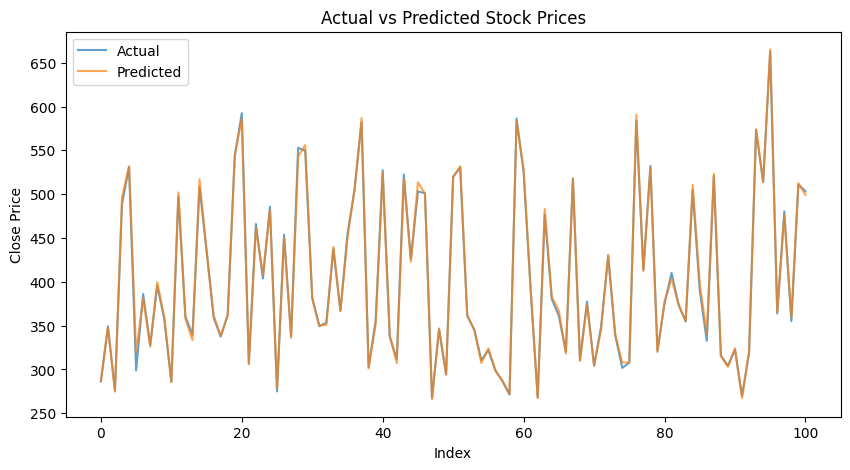

In [34]:
# Plot the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(y_test_reg.values, label='Actual', alpha=0.7)
plt.plot(y_pred_reg, label='Predicted', alpha=0.7)
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()